In [19]:
!pip install -q fastbook

import fastbook
fastbook.setup_book()
from fastbook import *

In [20]:
from fastai.vision.all import *



In [40]:
path= '/content/gdrive/"My Drive"/newdigits'
!ls {path}

train  valid


# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in Lab2
- `Resize(640)` as item transform
- A size of 420 in the batch transforms
- Use a batch size of 32
- Use `set_seed()` to obtain reproducible results.
- Augmentations you find useful (see question 1)

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

In [41]:

digits = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(640),
                 batch_tfms=aug_transforms(size=420, min_scale=1.0,max_lighting=0.2, max_warp=0.2,align_corners=True, p_affine=0.75, p_lighting=0.75))


In [42]:

dls = digits.dataloaders('/content/gdrive/My Drive/newdigits',bs=32)

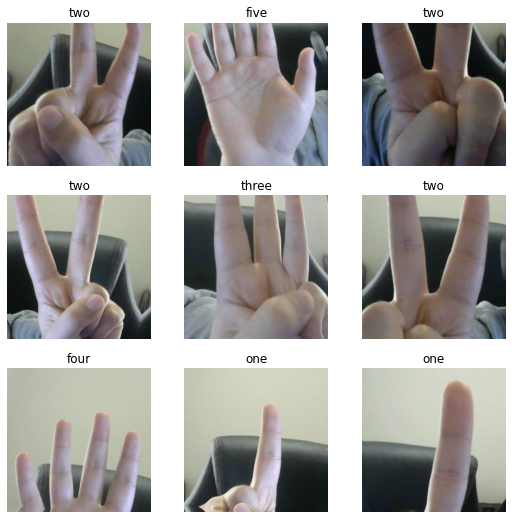

In [43]:

dls.train.show_batch()


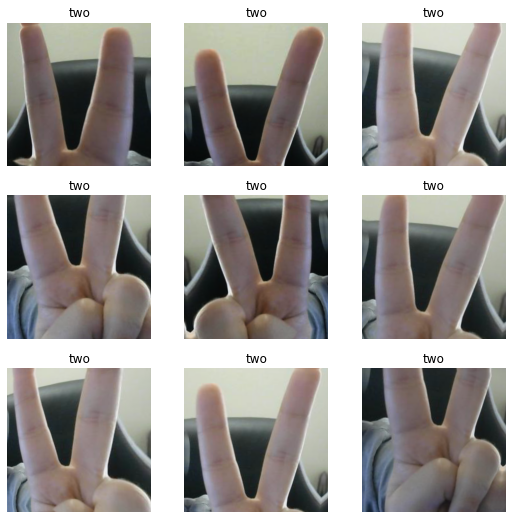

In [44]:
dls.train.show_batch(unique=True)

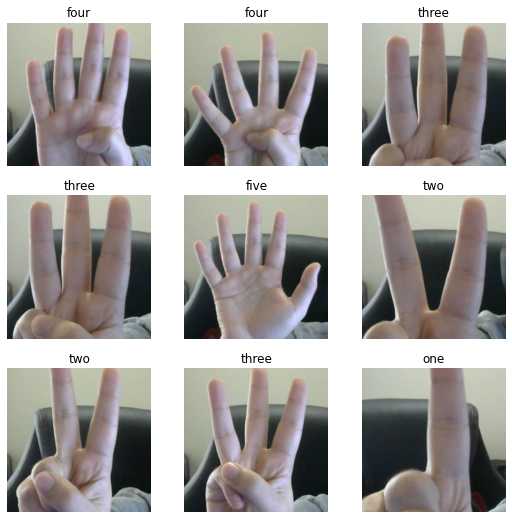

In [45]:

dls.valid.show_batch()

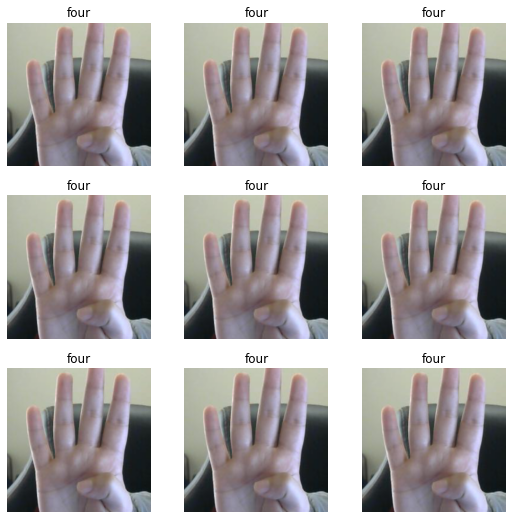

In [46]:
dls.valid.show_batch(unique=True)

### Question 1: How did you choose your augmentation transfroms? Include your thought process.
I chose the aug transforms using a variety of methods, i first experimented by taking simple transformations from the lecture notes and see how they affected things. by the end i decided to have transforms that would result in major changes and diffrences from image to image so the training and validation sets were very clearly different and this could be represented very well. As well i focused on using transforms that improved the quality of the images and made them easier to anlyze so itll help increase the accuracy later in the lab.


### Question 2: Are there any problems with your augmentations in the training data, or validation data, e.g. fingers missing, etc.?
*YOUR ANSWER HERE: there is issues in the training data in particular where fingers are cut off and too blurry but that is ok cause in the validation set its clearly only analyziing the proper fingers showing us that where it mattered there was no issues.



# 2. Train the classifier

## 2.1 Train a fastai cnn multi-class classifier
- ResNet18 architecture.
- accuracy as metric.
- learning rate finder to find initial learning rate.
- transfer learning with unfreezing using descriminative learning rates.
- use a batch size of 32 and the DataBlock from above.
- Use the same `set_seed()` as above to obtain reproducible results.

SuggestedLRs(valley=0.0012022644514217973)

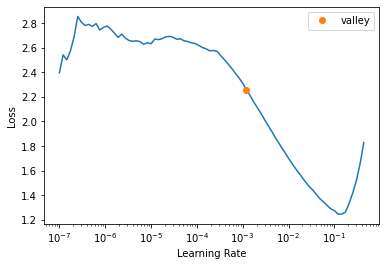

In [48]:
set_seed(42,True)
dls = digits.dataloaders('/content/gdrive/My Drive/newdigits', bs=32)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()



epoch,train_loss,valid_loss,accuracy,time
0,2.395725,2.843681,0.200000,00:01
1,2.443070,3.102166,0.100000,00:01
2,2.315840,3.758673,0.200000,00:01
3,2.089254,5.192944,0.100000,00:01
4,1.832497,5.683403,0.100000,00:01
5,1.660171,5.300650,0.100000,00:01
6,1.502893,4.528049,0.100000,00:01
7,1.410104,3.753109,0.100000,00:01


SuggestedLRs(valley=0.0010000000474974513)

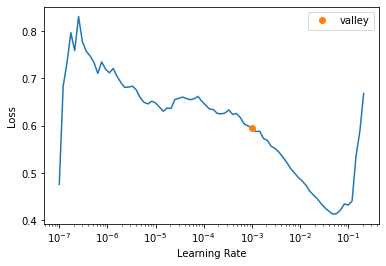

In [49]:

set_seed(42,True)
dls = digits.dataloaders('/content/gdrive/My Drive/newdigits', bs=32)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(8, 3e-3)
learn.lr_find()


In [50]:

learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6,2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.761250,3.100299,0.100000,00:01
1,0.660196,2.481515,0.200000,00:01
2,0.574241,1.936857,0.300000,00:01
3,0.543509,1.427292,0.400000,00:01
4,0.492214,1.123394,0.600000,00:01
5,0.443186,0.873244,0.600000,00:01
6,0.413391,0.666635,0.700000,00:01
7,0.373397,0.526221,0.700000,00:01
8,0.382117,0.441216,0.800000,00:01
9,0.372388,0.348404,0.800000,00:01


### Question 3: How did you select the number of epochs and learning rates? 
*YOUR ANSWER HERE: for selecting the epochs i would intially look at the validation loss and try to get it to a point where the values were barely changing anymore for validation loss, then i would stop the data. after that id look and see which had the highest accuracy score since that is the msot important metric top base it off of. in terms of the learning rate i would try and scale the values up to a high value to get as accurate as possible data shown. 



## 2.2 Experiment with different batch sizes
Using the pipeline, number of epochs, learning rates from above, re-run the pipeline with a batch size of 16, 64

In [56]:
set_seed(42,True)
dls = digits.dataloaders('/content/gdrive/My Drive/newdigits', bs=16)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(8, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6,2e-3))


epoch,train_loss,valid_loss,accuracy,time
0,2.939998,2.342972,0.200000,00:01
1,2.561629,2.731471,0.200000,00:01
2,2.205865,3.373785,0.100000,00:01
3,1.861686,3.156159,0.100000,00:01
4,1.694650,2.478292,0.100000,00:01
5,1.524914,1.908108,0.200000,00:01
6,1.408864,1.394162,0.400000,00:01
7,1.304967,0.935619,0.600000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.341190,0.722405,0.700000,00:01
1,0.331459,0.454107,0.800000,00:01
2,0.308313,0.327442,0.900000,00:01
3,0.383039,0.229157,0.900000,00:01
4,0.358004,0.162172,1.000000,00:01
5,0.356118,0.121469,1.000000,00:01
6,0.337469,0.102411,1.000000,00:01
7,0.326543,0.093395,1.000000,00:01
8,0.301735,0.093732,1.000000,00:01
9,0.320036,0.089387,1.000000,00:01


In [57]:
set_seed(42,True)
dls = digits.dataloaders('/content/gdrive/My Drive/newdigits', bs=64)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(8, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6,2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,nan,3.652562,0.100000,00:01
1,nan,3.652562,0.100000,00:01
2,nan,3.652562,0.100000,00:00
3,nan,3.652562,0.100000,00:00
4,nan,3.652562,0.100000,00:00
5,nan,3.652562,0.100000,00:00
6,nan,3.652562,0.100000,00:00
7,nan,3.652562,0.100000,00:00


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,accuracy,time
0,nan,3.652562,0.100000,00:00
1,nan,3.652562,0.100000,00:00
2,nan,3.652562,0.100000,00:00
3,nan,3.652562,0.100000,00:00
4,nan,3.652562,0.100000,00:00
5,nan,3.652562,0.100000,00:00
6,nan,3.652562,0.100000,00:00
7,nan,3.652562,0.100000,00:00
8,nan,3.652562,0.100000,00:00
9,nan,3.652562,0.100000,00:00


### Question 4: Keeping number of epochs and learning rates the same, how are validation loss and accuracy effected by the increase and decrease of batch size? 
*YOUR ANSWER HERE: I found that by increasing the batch size to 64 there was a slight decrease in the accuracy scores as well the validation loss stayed about the same but was slightly higher this time around, since accuracy is the msot important score we focused on that mainly and concluded that a higher batch size was worse for the model. On the other hand when we decreased the batch size we found the accuracy to be around the same 90% range , as well the validation loss was much smaller and the values were alot closer together and didnt have as much variance. having 32 for the batch size was the best for this lab, it wasnt too much where we started to overfit and have a fall off in accuracy and it wasnt too little where we undefit and didnt have as accurate of information. 



# 3. Analyze model performance
Retrain the model with batch size of 32 from the previous section.

Plot the confusion matrix.

In [53]:
set_seed(42,True)
dls = digits.dataloaders('/content/gdrive/My Drive/newdigits', bs=34)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(8, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(10, lr_max=slice(1e-6,2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.469652,2.830998,0.200000,00:01
1,2.446624,2.894978,0.200000,00:01
2,2.297474,3.745696,0.200000,00:01
3,2.034415,5.224555,0.100000,00:01
4,1.799146,5.615171,0.100000,00:01
5,1.648375,5.198716,0.100000,00:01
6,1.497838,4.449174,0.100000,00:01
7,1.414345,3.724188,0.100000,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.489563,3.158027,0.100000,00:01
1,0.533315,2.637583,0.200000,00:01
2,0.649960,1.989169,0.300000,00:01
3,0.594378,1.391204,0.400000,00:01
4,0.585691,1.123739,0.600000,00:01
5,0.563521,0.944040,0.600000,00:01
6,0.528053,0.740680,0.600000,00:01
7,0.493318,0.537677,0.700000,00:01
8,0.480872,0.408777,0.800000,00:01
9,0.485202,0.325574,0.900000,00:01


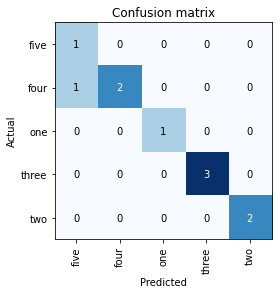

In [54]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

In [55]:
learn.export(os.path.abspath('model.pkl'))

# 5. Summary and Conclusion

Summarize:
- Augmentations used
- Training strategy, including batch size, number of epochs and learning rates.
- Accuracy achieved, summary of confusion matrix

*YOUR ANSWER HERE: i used a variety of augmentations that focused on improving the quality of the images and the positioning to make the training set as clear as possible to get very accurate results for the validation set. My training strategy involved focusing oin the validation loss to then choose how many epochs was appropriate, after seeing the validation loss stabalize i would then focus on accuracy and choose the most accurate epoch amount from that point, this would then produce the most accurate results. We also played around and compared different batch sizes, at the 16 and 64 batch size the model was either underfitting or overfitting respectively, so we found 32 to be the ideal batch size, mixed with a large learning rate we got the most accurate results possible. Looking at the confusion matrix we found there was almost no errors, proving that we had created a good model that was very accurate. 


Conclusion:
- Are you satisfied with model performance? Why, why not? 
In conclusion I was very satisfied by the models preformance because it had very high accuracy scores reaching the above 90% range and low validation loss. As well the confusion matrix showed that we had very good scores and very few incorrect portions, further proving the model created was very good. 


*YOUR ANSWER HERE*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*YOUR ANSWER HERE:
I like how this assignment built off of the last one and furthered our knowledge, the one thing i didnt like was how long it would sometimes take for the code to finish processing enitrely but it felt rewarding and challenged us to do things more efficiently which was nice. 
